2.) Build a neural net classifier predicting survival.   The authors did not use a Neural network.

3.) Tune your neural network to optimum performance

4.) Use SHAP and/or ELI5 to determine what variables are most important


5.) For your model, compute all the statistics shown in figure 5 of the paper.    

6.) Discuss how well your model performed relative to the models in the paper.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

infile1= "/content/Norwegian.xlsx"
survivalTraining= pd.read_excel(infile1)

In [8]:
survivalTraining.head()

,Age (years),"Sex (0 male, 1 female)",Length of stay (days),"Hospital outcome (0 alive, 1 dead)",Episode number,ICD-10 1,ICD-10 2,ICD-10 3,ICD-10 4,ICD-10 5,ICD-10 6,ICD-10 7,ICD-10 8,ICD-10 9
0,21,1,1,0,1,,J159,,,,,,,
1,20,1,5,0,1,J158,,,,,,,,
2,21,1,3,0,1,J157,E86,,,,,,,
3,77,0,18,0,1,,J159,,,,,,,
4,72,0,9,0,1,A415,I509,A418,K810,,,,,


"Since the main goal of this study is to predict the survival of the patient, we discarded the length of stay because it strongly relates to the likelihood to survive: the longer the patient has to stay in the hospital, the less likely she/he will survive.

I will do the above after importing the validation data.

In [10]:
infile1= "/content/KoreanPatients.xlsx"
survivalValidation= pd.read_excel(infile1)

In [12]:
survivalValidation.head()

,Number,sex,age,hospital stay,mortality,APACHE II,ASA,Preop shock,postop shock,HTN,...,Albumin-1,Albumin-0,Albumin+1,Albumin+3,Albumin+7,T-bilirubin-1,T-bilirubin-0,T-bilirubin+1,T-bilirubin+3,T-bilirubin+7
0,1,1,18,8,0,NaN,1,0,0,0,...,4.4,3.9,3.6,3.8,NaN,0.9,1.1,1.2,0.8,NaN
1,2,1,20,27,0,12.0,1,0,0,0,...,3.7,2.1,2.9,2.9,2.7,0.9,1.2,0.9,0.6,0.4
2,3,1,20,47,0,NaN,1,1,0,0,...,3.1,1.8,2.7,2.9,3.5,0.3,0.7,0.9,0.5,0.3
3,4,1,21,25,0,14.0,1,0,0,0,...,3.2,3.1,3.2,2.8,3.2,0.3,0.7,1.2,0.7,0.6
4,5,1,22,14,0,NaN,3,0,0,0,...,4.3,2.9,3.3,3.3,3.0,1.2,1.2,1.1,0.7,0.4


In [13]:
survivalValidation.columns

Index(['Number', 'sex', 'age', 'hospital stay', 'mortality', 'APACHE II',
       'ASA', 'Preop shock', 'postop shock', 'HTN', 'DM', 'CRF', 'Pul TBC',
       'malignancy ', 'Diagnosis', 'Location of lesion ', 'surgery type',
       'anastomotic leak', 'infectious', 'wound cx', 'new sepsis', 'pulmonary',
       'AKI', 'ileus', 'blood culture', 'peritoneal fluid culture', 'CRP-1',
       'CRP-0', 'CRP+1', 'CRP+3', 'CRP+7', 'Hb-1', 'Hb-0', 'Hb+1', 'Hb+3',
       'Hb+7', 'Platelet-1', 'Platelet-0', 'Platelet+1', 'Platelet+3',
       'Platelet+7', 'Cholesterol-1', 'Cholesterol-0', 'Cholesterol+1',
       'choleterol+3', 'cholesterol+7', 'Albumin-1', 'Albumin-0', 'Albumin+1',
       'Albumin+3', 'Albumin+7', 'T-bilirubin-1', 'T-bilirubin-0',
       'T-bilirubin+1', 'T-bilirubin+3', 'T-bilirubin+7'],
      dtype='object')

In [14]:
survivalTraining.columns

Index(['Age (years)', 'Sex (0 male, 1 female)', 'Length of stay (days)',
       'Hospital outcome (0 alive, 1 dead)', 'Episode number', 'ICD-10 1',
       'ICD-10 2', 'ICD-10 3', 'ICD-10 4', 'ICD-10 5', 'ICD-10 6', 'ICD-10 7',
       'ICD-10 8', 'ICD-10 9'],
      dtype='object')

In [15]:
survivalTraining['Age (years)']

0         21
1         20
2         21
3         77
4         72
          ..
110199     0
110200     0
110201    70
110202     0
110203     0
Name: Age (years), Length: 110204, dtype: int64

In [16]:
survivalTraining.head()

,Age (years),"Sex (0 male, 1 female)",Length of stay (days),"Hospital outcome (0 alive, 1 dead)",Episode number,ICD-10 1,ICD-10 2,ICD-10 3,ICD-10 4,ICD-10 5,ICD-10 6,ICD-10 7,ICD-10 8,ICD-10 9
0,21,1,1,0,1,,J159,,,,,,,
1,20,1,5,0,1,J158,,,,,,,,
2,21,1,3,0,1,J157,E86,,,,,,,
3,77,0,18,0,1,,J159,,,,,,,
4,72,0,9,0,1,A415,I509,A418,K810,,,,,


I am just going to be working with the Norwegian data because the table I am trying to calculate only uses data from the norwegian data.

In [17]:
survivalTraining['Episode number'].unique()

array([1, 2, 3, 4, 5])

In [18]:
survivalTraining['Sex (0 male, 1 female)'].unique()

array([1, 0])

In [19]:
survivalTraining['Age (years)'].unique()

array([ 21,  20,  77,  72,  83,  74,  69,  53,  82,  75,  45,  56,  46,
        48,  40,  39,  70,  47,  27,  11,  91,   7,  79,  84,  16,  73,
        17,  18,  63,  88,  89,  76,  41,  66,  80,  62,  59,  55,  68,
        33,  71,   8,  58,  78,  51,  43,  44,  60,  86,  61,  67,  57,
        81,  49,  64,  25,  65,  42,  36,  38,  85,  24,  19,  37,  35,
         6,  50,  87,  54,  29,  12,  10,  23,  52,   9,  15,  31,  92,
        28,  30,  13,  94,  90,  26,  32,  95,   5,  93,  34,  96,  22,
        97,  98, 100,  14,   4,  99,   3,   2,   1,   0])

In [20]:
survivalTraining[['Age (years)','Episode number']]

,Age (years),Episode number
0,21,1
1,20,1
2,21,1
3,77,1
4,72,1
...,...,...
110199,0,1
110200,0,1
110201,70,1
110202,0,1


Nothing is missing this is beautiful, I wish it was like this everytime

I am going to use the Sex catagory as is, and stadscale the "Episode number" and "age"

In [21]:
standardizeNeeded= survivalTraining[['Age (years)','Episode number']]

In [22]:
from sklearn.preprocessing import StandardScaler


In [23]:

scaler = StandardScaler()
patientContinuous = scaler.fit_transform(standardizeNeeded)

In [24]:
patientContinuous= pd.DataFrame(patientContinuous,columns=standardizeNeeded.columns)

In [25]:
patientContinuous.head()

,Age (years),Episode number
0,-1.729837,-0.464727
1,-1.771285,-0.464727
2,-1.729837,-0.464727
3,0.591243,-0.464727
4,0.384004,-0.464727


In [26]:
inputVariables = pd.concat([patientContinuous,survivalTraining['Sex (0 male, 1 female)']],axis=1)

In [27]:
inputVariables

,Age (years),Episode number,"Sex (0 male, 1 female)"
0,-1.729837,-0.464727,1
1,-1.771285,-0.464727,1
2,-1.729837,-0.464727,1
3,0.591243,-0.464727,0
4,0.384004,-0.464727,0
...,...,...,...
110199,-2.600242,-0.464727,0
110200,-2.600242,-0.464727,1
110201,0.301108,-0.464727,1
110202,-2.600242,-0.464727,0


In [28]:
y=survivalTraining['Hospital outcome (0 alive, 1 dead)']

# The study cohort for the paper was about 20%

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputVariables, y,train_size=0.8,random_state=1)


Well that may not be what we want as we want to cosider the entire dataset for traning and for testing we need to meet the requrement:
"Accordingly, the final study cohort consisted of cases fulfilling one or several infection or sepsis related ICD-10 codes as well as one or several codes for acute organ dysfunction (Fig 1)."

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0187990#sec005

In [30]:
survivalTraining.head()

,Age (years),"Sex (0 male, 1 female)",Length of stay (days),"Hospital outcome (0 alive, 1 dead)",Episode number,ICD-10 1,ICD-10 2,ICD-10 3,ICD-10 4,ICD-10 5,ICD-10 6,ICD-10 7,ICD-10 8,ICD-10 9
0,21,1,1,0,1,,J159,,,,,,,
1,20,1,5,0,1,J158,,,,,,,,
2,21,1,3,0,1,J157,E86,,,,,,,
3,77,0,18,0,1,,J159,,,,,,,
4,72,0,9,0,1,A415,I509,A418,K810,,,,,


In [31]:
specialRows = survivalTraining[['ICD-10 1','ICD-10 2','ICD-10 3','ICD-10 4','ICD-10 5','ICD-10 6','ICD-10 7','ICD-10 8','ICD-10 9']]== "R65.11"

In [32]:
specialRows.any().unique()

array([False])

I give up trying to figure out how they came up with a study cohort I don't know what the code for organ failiure is.

#Nural Net

In [33]:
from sklearn.neural_network import MLPClassifier

In [34]:
clf = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, batch_size=int(min(200/2, inputVariables.shape[0]/2)),max_iter=50000,hidden_layer_sizes=(50,25,25,), verbose=True, warm_start=False)

clf.fit(inputVariables,y)
y_pred=clf.predict(inputVariables)

Iteration 1, loss = 0.25543784
Iteration 2, loss = 0.24331635
Iteration 3, loss = 0.24355247
Iteration 4, loss = 0.24318582
Iteration 5, loss = 0.24319076
Iteration 6, loss = 0.24313068
Iteration 7, loss = 0.24311207
Iteration 8, loss = 0.24295093
Iteration 9, loss = 0.24292323
Iteration 10, loss = 0.24290145
Iteration 11, loss = 0.24294107
Iteration 12, loss = 0.24292504
Iteration 13, loss = 0.24274989
Iteration 14, loss = 0.24282288
Iteration 15, loss = 0.24274346
Iteration 16, loss = 0.24279943
Iteration 17, loss = 0.24278841
Iteration 18, loss = 0.24267316
Iteration 19, loss = 0.24268904
Iteration 20, loss = 0.24266828
Iteration 21, loss = 0.24280792
Iteration 22, loss = 0.24267014
Iteration 23, loss = 0.24263976
Iteration 24, loss = 0.24267503
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [38]:
from sklearn.metrics import r2_score
clf.score(inputVariables, y
          )

0.9264545751515372

In [36]:
sum(y_pred)

0

yay they are all dead, NO!

In [49]:
myTest =  pd.concat([patientContinuous,survivalTraining['Sex (0 male, 1 female)'],y],axis=1)

In [50]:
theDead =myTest[myTest['Hospital outcome (0 alive, 1 dead)'] == 1]

In [51]:
theAlive = myTest[myTest['Hospital outcome (0 alive, 1 dead)'] == 0]

In [74]:
theAliveSubset = theAlive.sample(n = (int(8105*1.5)))

In [75]:
int(8105*1.5)

12157

In [76]:
len(theDead)

8105

In [77]:
newTrain = pd.concat([theAliveSubset,theDead])

In [78]:
newTrain

,Age (years),Episode number,"Sex (0 male, 1 female)","Hospital outcome (0 alive, 1 dead)"
83242,-0.983776,-0.464727,0,0
17630,0.964274,0.865423,0,0
82660,0.632691,-0.464727,0,0
29022,0.964274,-0.464727,1,0
63354,-1.481150,-0.464727,1,0
...,...,...,...,...
110072,-0.030475,-0.464727,1,1
110079,1.005722,-0.464727,0,1
110113,0.632691,-0.464727,1,1
110174,0.301108,-0.464727,0,1


In [79]:
newTrainInput = newTrain.drop(['Hospital outcome (0 alive, 1 dead)'], axis=1)

In [80]:
newY = newTrain['Hospital outcome (0 alive, 1 dead)']

In [81]:
newY

83242     0
17630     0
82660     0
29022     0
63354     0
         ..
110072    1
110079    1
110113    1
110174    1
110198    1
Name: Hospital outcome (0 alive, 1 dead), Length: 20262, dtype: int64

In [82]:
clf2 = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, batch_size=int(min(200/2, newTrainInput.shape[0]/2)),max_iter=50000,hidden_layer_sizes=(50,25,25,), verbose=True, warm_start=False)

clf2.fit(newTrainInput,newY)
y_pred2=clf2.predict(newTrainInput)

Iteration 1, loss = 0.61280211
Iteration 2, loss = 0.59889772
Iteration 3, loss = 0.59799681
Iteration 4, loss = 0.59786044
Iteration 5, loss = 0.59795745
Iteration 6, loss = 0.59768780
Iteration 7, loss = 0.59743533
Iteration 8, loss = 0.59713838
Iteration 9, loss = 0.59711608
Iteration 10, loss = 0.59715828
Iteration 11, loss = 0.59705590
Iteration 12, loss = 0.59707264
Iteration 13, loss = 0.59733849
Iteration 14, loss = 0.59767562
Iteration 15, loss = 0.59731802
Iteration 16, loss = 0.59716028
Iteration 17, loss = 0.59673474
Iteration 18, loss = 0.59687660
Iteration 19, loss = 0.59676683
Iteration 20, loss = 0.59669287
Iteration 21, loss = 0.59673651
Iteration 22, loss = 0.59704310
Iteration 23, loss = 0.59692419
Iteration 24, loss = 0.59665940
Iteration 25, loss = 0.59691809
Iteration 26, loss = 0.59688241
Iteration 27, loss = 0.59661342
Iteration 28, loss = 0.59678949
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [84]:
sum(y_pred2)

8081

In [72]:
sum(y_pred2)/sum(newY) #mmmmmmmm lets see if I improve from the 1x dead

1.2204811844540406

In [85]:
# Lets try 1.5x the dead.
sum(y_pred2)/sum(newY)

0.997038864898211

In [ ]:
#seems like a sweet spot here.

In [86]:
len(newTrainInput)

20262

score(X, y[, sample_weight])

Return the mean accuracy on the given test data and labels.

first Try lets do better

In [87]:
clf2.score(newTrainInput, newY)

0.6551179547922219

#Second try 75% at 3x the the rate of alive then dead lets try 4x the alive.

In [ ]:
clf2.score(newTrainInput, newY)

0.75

4x The alive

In [ ]:
clf2.score(newTrainInput, newY)

0.8

#Even better at 4x the alive, lets try 5x

In [ ]:
clf2.score(newTrainInput, newY)

0.8333333333333334

5x is slightly better what about 6x.

In [ ]:
clf2.score(newTrainInput, newY)

0.8571428571428571

In [ ]:
#7x
clf2.score(newTrainInput, newY)

0.875

In [ ]:
#8x
clf2.score(newTrainInput, newY)

0.8888888888888888

In [ ]:
newTrainInput

,Age (years),Episode number
54468,0.632691,-0.464727
47074,-0.983776,0.865423
76483,-1.481150,-0.464727
103484,-2.600242,-0.464727
85778,1.212961,-0.464727
...,...,...
110072,-0.030475,-0.464727
110079,1.005722,-0.464727
110113,0.632691,-0.464727
110174,0.301108,-0.464727


In [ ]:
inputVariables

,Age (years),Episode number,"Sex (0 male, 1 female)"
0,-1.729837,-0.464727,1
1,-1.771285,-0.464727,1
2,-1.729837,-0.464727,1
3,0.591243,-0.464727,0
4,0.384004,-0.464727,0
...,...,...,...
110199,-2.600242,-0.464727,0
110200,-2.600242,-0.464727,1
110201,0.301108,-0.464727,1
110202,-2.600242,-0.464727,0


In [ ]:
#Ok lets try this model on the whole set.
clf2.score(inputVariables.drop(['Sex (0 male, 1 female)'], axis=1), y)

0.9264545751515372

In [94]:
#1.x on whole set
clf2.score(inputVariables, y)

0.6980145911219193

In [95]:
#I will go with this

# The accuracy increases as we increase the amount of dead but it doesn't predict anyone died.

#Use SHAP and/or ELI5 to determine what variables are most important

In [96]:
!pip install shap

In [97]:
import shap

In [100]:
explainer = shap.PermutationExplainer(clf2.predict,newTrainInput)

In [101]:
shap_values = explainer.shap_values(newTrainInput)

PermutationExplainer explainer: 20263it [14:26, 22.97it/s]


In [108]:
features=newTrainInput.columns

In [110]:
shap_values

array([[-0.445 , -0.005 ,  0.    ],
       [ 0.485 ,  0.0575,  0.0075],
       [ 0.3   ,  0.0175,  0.2325],
       ...,
       [-0.175 ,  0.015 , -0.29  ],
       [-0.445 , -0.005 ,  0.    ],
       [-0.4175, -0.005 , -0.0275]])

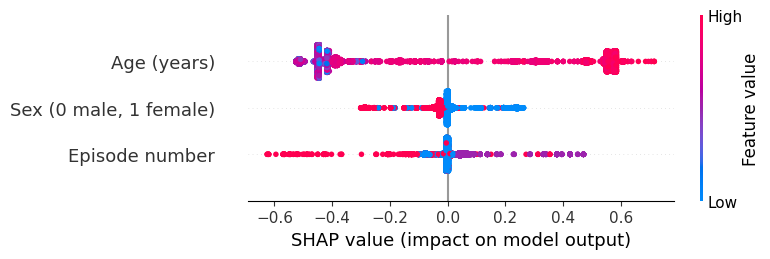

In [111]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))

shap.summary_plot(shap_values,newTrainInput,feature_names=features)

Low episode number has no impact on shap, midium episode numbers has positive impact and high episode number has negative.

Sex: low: positive impace, high: negative impact
Age: High age has postive impact on shap while modeterate and low age has negative impact.

For your model, compute all the statistics shown in figure 5 of the paper.

PR AUC

In [139]:
from sklearn import metrics

In [140]:
from sklearn.metrics import precision_recall_curve, auc

In [119]:
newY=np.array(newY)

In [123]:
len(y_pred2)

20262

In [130]:
precision, recall,_= precision_recall_curve(newY, y_pred2)

In [131]:
precision, recall,_= precision_recall_curve(newY, y_pred2)
pr_auc = auc(recall, precision)

In [132]:
print("PR-AUC Score:", pr_auc)

PR-AUC Score: 0.6547867558456871


In [136]:
#ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(newY, y_pred2)

0.6405040835009896

In [ ]:
#TP rate

In [141]:
confusion_matrix = metrics.confusion_matrix(newY, y_pred2)

In [142]:
from sklearn.metrics import precision_score

TP = np.diag(confusion_matrix)

In [145]:
confusion_matrix

array([[8675, 3482],
       [3506, 4599]])

In [150]:
sum(sum(confusion_matrix))

20262

In [151]:
sum(TP)/sum(sum(confusion_matrix))

0.6551179547922219

In [171]:
#TN rate
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TN = confusion_matrix.sum().sum() - (FP+ FN + TP)


In [172]:
TNR = TN/(TN+FP)

In [174]:
confusion_matrix[1][1]/confusion_matrix.sum()

0.22697660645543383

In [177]:
#	PPV
#true pos/ tru pos + false pos
confusion_matrix[0][0]/confusion_matrix[0].sum()

0.7135806531216583

In [179]:
#NPV
#true neg/ tru neg + false neg

confusion_matrix[1][1]/confusion_matrix[1].sum()

0.5674275138803208

In [180]:
#MCC
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(newY, y_pred2)


0.28114776476327313

In [181]:
#F_1 score
from sklearn.metrics import f1_score
f1_score(newY, y_pred2)

0.5682688743358458

In [182]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(newY, y_pred2)

0.6551179547922219


My model would be alomost perfect if I used the whole data to train my model becuase it preditcs that everyone is alive. But I used a subset where I got a buch of dead ones and a bunch of alive ones and trained on those.

PR-AUC Score: 0.6547867558456871 all of his models on the study cohort and the primary cohort does better.
Roc AUC : 0.6405040835009896 mine does better on the selected subset of data for some of rows and columns in table 5 such as gradient boosting for the study cohort.
Tp rate: 0.6551179547922219 mine has higher rate except linear regression and gradient boosting.

TN rate: 0.22697660645543383 gradient boosting bosting in the study chort is the only one with a lower rate.


PPV:0.7135806531216583 worse than all his models for both study and primary.

NPV:0.5674275138803208 my NPV is better at detecting negatives.


MCC:0.28114776476327313
Mine is better than all of his as it is higher.

F_1 score:0.5682688743358458

This is lower than all of them exept linear svm. So it's worse based on this metric so it's only better than linear SVM in terms of correction.

accuracy:0.6551179547922219

Linear SVM , RADICAL SVM and Naive bayes are the only ones that does worse everything else is more accurate for both the study and primary cohort.
```
# This is formatted as code
```

